<a href="https://colab.research.google.com/github/Bhashyam39/Bhashyam39/blob/main/zomato_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍴 Zomato Restaurants EDA

## 📝 Problem Statement  (My Comment)
The growth of food delivery platforms like Zomato has created vast amounts of restaurant and customer data.  
Understanding this data is essential for identifying patterns in customer preferences, cuisine diversity, pricing, and restaurant performance across different countries.  

This analysis explores the Zomato restaurant dataset to uncover insights into:  
- Which cuisines are most popular globally and within specific countries.  
- How restaurant ratings vary across regions and price ranges.  
- What the geographic distribution of Zomato-listed restaurants looks like.  
- How services such as online delivery and table booking correlate with ratings and engagement.  





## 📊 About the Dataset  

The dataset is sourced from Zomato, a popular restaurant discovery and food delivery platform. It contains detailed information about thousands of restaurants across multiple countries. Each row represents a restaurant, with attributes describing its identity, location, cuisine, services, and customer ratings.  

### Key Features:  
- **Restaurant ID & Name** – Unique identifier and restaurant name.  
- **Country Code & City** – Geographic information, later merged with a lookup file to map country names.  
- **Cuisines** – Types of food offered (often multiple cuisines per restaurant).  
- **Price Range** – Ordinal category (1 = inexpensive, 4 = luxury).  
- **Average Cost for Two** – Typical cost for a meal for two people, in local currency.  
- **Has Table Booking / Has Online Delivery** – Binary indicators of services provided.  
- **Aggregate Rating & Rating Color/Text** – Customer rating scores and their qualitative labels.  
- **Votes** – Number of customers who rated the restaurant.  

### Limitations:  
- The dataset is **biased toward Indian restaurants**, since Zomato is most active there.  
- Many records have **missing values** (especially in cuisines).  
- Duplicate entries exist for some restaurants.  
- Ratings may reflect **user bias** (skewed toward average values).  

This dataset is ideal for practicing **EDA** because it includes a mix of categorical, numerical, and text features, along with real-world issues like missing data, duplicates, and inconsistent formatting.  


**Link to the reffered Kaggle notebook:** https://www.kaggle.com/code/abdullahsaida011/zomato-eda


# import nedded libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings

warnings.filterwarnings("ignore")


# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 📝 Data Loading  
Downloaded Dataset is uploaded into Google Drive and reading it into Google Colab  


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DTSC 5502/Module 3/Claim Assignment/zomato.csv",encoding='latin-1')

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 📝 Dataset Overview  
Checking the Dataset shape, columns and datatypes of instance in the dataset.



In [ ]:
df.shape

(9551, 21)

In [ ]:

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# data preprocessing

## Data Cleaning  
Checking the data for missing values

In [ ]:
nan_counts = df.isnull().sum()

nan_precebtage = (nan_counts/len(df))*100

nan_precebtage

,0
Restaurant ID,0.000000
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Address,0.000000
Locality,0.000000
Locality Verbose,0.000000
Longitude,0.000000
Latitude,0.000000
Cuisines,0.094231


In [ ]:
print(df["Cuisines"].value_counts())

print(df["Cuisines"].isnull().sum())

Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, Bí_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64
9


## Data merging

Merging another dataset called country code which is important for the further analysis

In [ ]:
df2 =pd.read_excel("/content/drive/MyDrive/DTSC 5502/Module 3/Claim Assignment/Country-Code.xlsx")

df = pd.merge(df,df2,how ="left" , on= "Country Code")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Cuisines'].fillna('Unknown', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Exploratory data analysis (EDA)

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df["Country"].value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [ ]:
average_rating_by_Countries= df.groupby('Country')['Aggregate rating'].mean().reset_index()

sorted_average_rating = average_rating_by_Countries.sort_values(by='Aggregate rating', ascending=False)

sorted_average_rating

,Country,Aggregate rating
6,Phillipines,4.468182
11,Turkey,4.300000
4,Indonesia,4.295238
5,New Zealand,4.262500
12,UAE,4.233333
9,South Africa,4.210000
13,United Kingdom,4.087500
7,Qatar,4.060000
14,United States,4.004378
10,Sri Lanka,3.870000


Visulizing the average rating of restaurant by country.

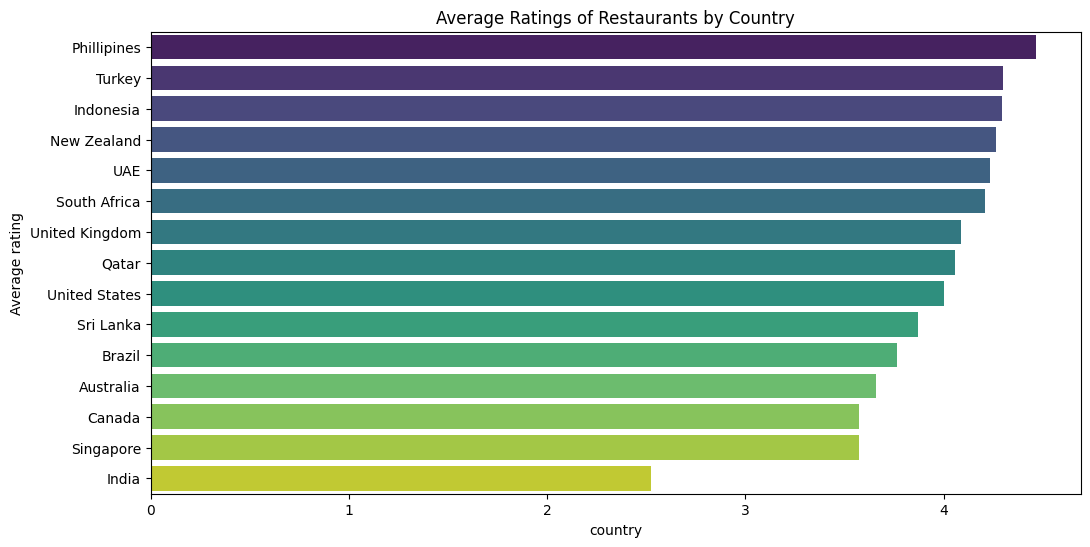

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=sorted_average_rating,y="Country",x="Aggregate rating" ,palette='viridis')

plt.xlabel("country")

plt.ylabel("Average rating")

plt.title('Average Ratings of Restaurants by Country')

plt.show()

In [ ]:
Qatar=df[df["Country"]=="Qatar"]

Qatar["Restaurant Name"].unique()

array(['7st by Mumbai Spices', 'Indian Coffee House',
       'Zaffran Dining Experience', 'MRA Bakery Sweets & Restaurant',
       'Zaoq', 'Aalishan', "Applebee's", 'Mainland China Restaurant',
       'Ponderosa', 'Gokul Gujarati Restaurant',
       'The Manhattan FISH MARKET', 'Coral - InterContinental Doha',
       'Texas Roadhouse', 'Punjab Restaurant', 'Gymkhana', 'Eatopia',
       'Vine - The St. Regis', 'Sabai Thai - The Westin Doha Hotel & Spa',
       'Paper Moon', 'Roti & Boti'], dtype=object)

In [ ]:
Restaurant = Qatar.groupby("Restaurant Name")['Aggregate rating'].mean().reset_index()

Resturant_top= Restaurant.sort_values(by='Aggregate rating', ascending=False)

Resturant_top=Resturant_top.head(5)

Resturant_top

,Restaurant Name,Aggregate rating
9,Mainland China Restaurant,4.9
6,Gymkhana,4.7
18,Zaffran Dining Experience,4.6
10,Paper Moon,4.5
17,Vine - The St. Regis,4.4


In [ ]:
Qatar_top_rating = px.bar(Resturant_top, x="Restaurant Name", y="Aggregate rating", title="Top 5 Restaurants in Qatar",color ="Restaurant Name")

Qatar_top_rating.show()

In [ ]:
df.groupby("Country")["Currency"].unique()

,Currency
Country,
Australia,[Dollar($)]
Brazil,[Brazilian Real(R$)]
Canada,[Dollar($)]
India,[Indian Rupees(Rs.)]
Indonesia,[Indonesian Rupiah(IDR)]
New Zealand,[NewZealand($)]
Phillipines,[Botswana Pula(P)]
Qatar,[Qatari Rial(QR)]
Singapore,[Dollar($)]


In [ ]:
currency_mapping = {

    'Dollar($)': ('USD', 1),

    'Brazilian Real(R$)': ('BRL', 0.19),

    'Indian Rupees(Rs.)': ('INR', 0.012),

    'Indonesian Rupiah(IDR)': ('IDR', 0.000067),

    'NewZealand($)': ('NZD', 0.65),

    'Botswana Pula(P)': ('BWP', 0.090),

    'Qatari Rial(QR)': ('QAR', 0.27),

    'Rand(R)': ('ZAR', 0.053),

    'Sri Lankan Rupee(LKR)': ('LKR', 0.0030),

    'Turkish Lira(TL)': ('TRY', 0.038),

    'Emirati Diram(AED)': ('AED', 0.27),

    'Pounds(£)': ('GBP', 1.36)

}

def convert_to_usd(row):

    currency_text = row['Currency']

    amount = row['Average Cost for two']

    currency_info = currency_mapping.get(currency_text, None)

    if currency_info is None:

        return None

    else:

        currency_code, conversion_rate = currency_info

        converted_amount = amount * conversion_rate

        return round(converted_amount, 2)

df['Average Cost for two Dollar($)'] = df.apply(convert_to_usd, axis=1)

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two Dollar($)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,99.00
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,108.00
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,360.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,135.00
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,135.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,3,4.1,Green,Very Good,788,Turkey,3.04
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,3.99
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,6.46
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,4.56


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Average Cost for two Dollar($)'],
      dtype='object')

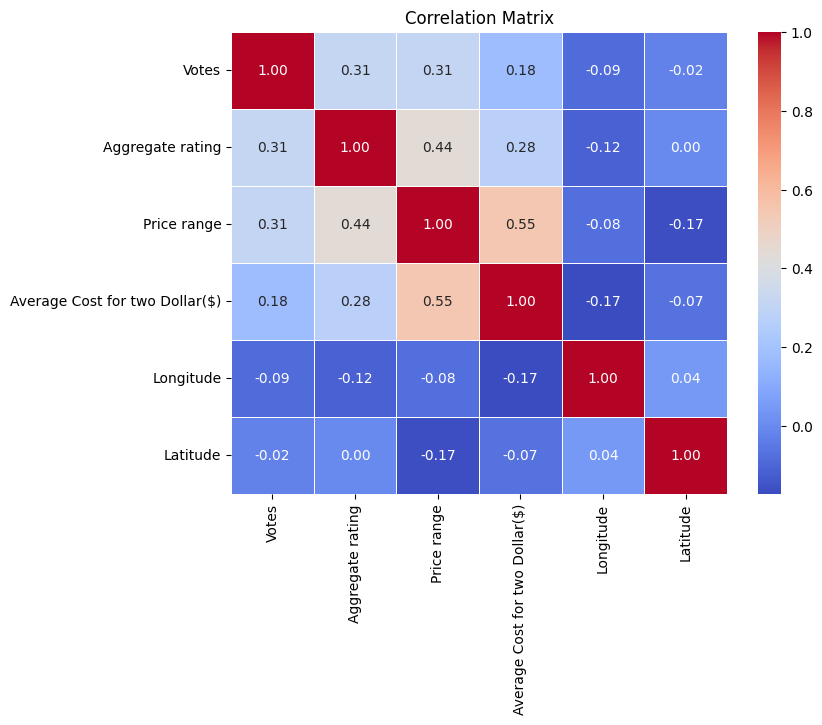

In [ ]:
columns_to_analyze = ['Votes', 'Aggregate rating', 'Price range', 'Average Cost for two Dollar($)','Longitude', 'Latitude']

correlation_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

In [ ]:
Average_cost_by_country = df.groupby("Country")["Average Cost for two Dollar($)"].mean().reset_index()

Average_cost_by_country = Average_cost_by_country.sort_values(by=["Average Cost for two Dollar($)"],ascending = False)

Average_cost_by_country=Average_cost_by_country.head()

Average_cost_by_country

,Country,Average Cost for two Dollar($)
8,Singapore,155.750000
6,Phillipines,144.613636
13,United Kingdom,65.025000
7,Qatar,60.412500
5,New Zealand,45.337500


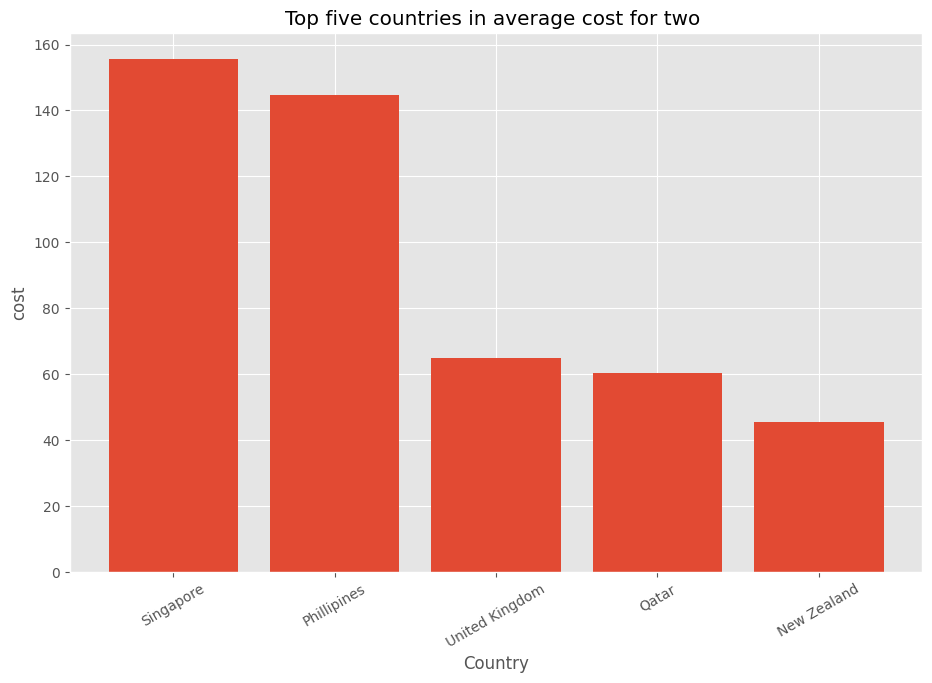

In [ ]:
plt.figure(figsize=(11,7))

plt.style.use('ggplot')

x=Average_cost_by_country["Country"]

y=Average_cost_by_country["Average Cost for two Dollar($)"]

plt.bar(x,y)

plt.title("Top five countries in average cost for two ")

plt.xlabel("Country")

plt.ylabel("cost")

plt.xticks(rotation = 30)

plt.show()

In [ ]:
Average_cost_by_country = df.groupby("Country")["Average Cost for two Dollar($)"].mean().reset_index()

Average_cost_by_country = Average_cost_by_country.sort_values(by=["Average Cost for two Dollar($)"],ascending = True)

Average_cost_by_country = Average_cost_by_country.head()

Average_cost_by_country


,Country,Average Cost for two Dollar($)
11,Turkey,3.224412
10,Sri Lanka,7.125000
3,India,7.480444
4,Indonesia,18.839524
9,South Africa,22.245833


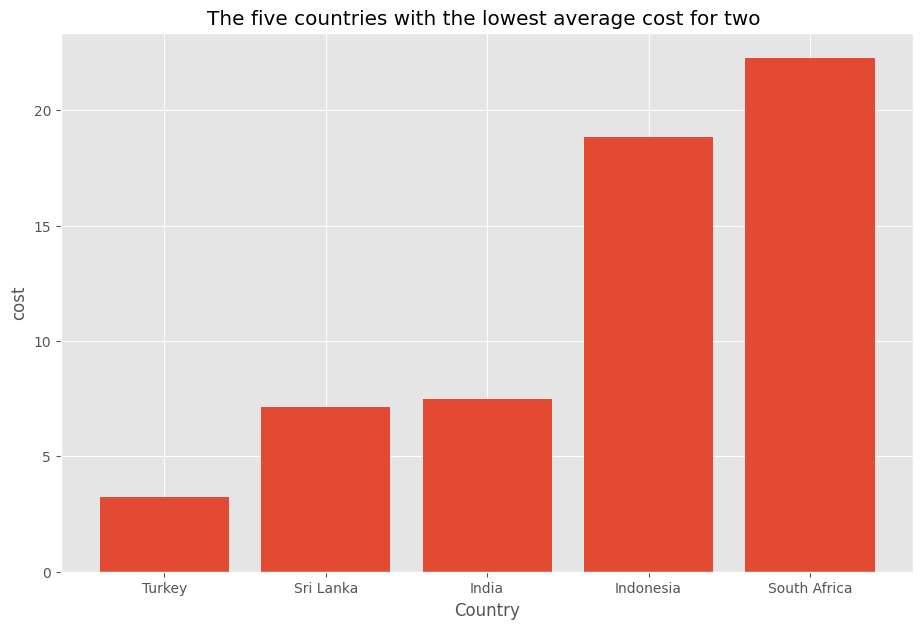

In [ ]:
plt.figure(figsize=(11,7))

plt.style.use('ggplot')

x=Average_cost_by_country["Country"]

y=Average_cost_by_country["Average Cost for two Dollar($)"]

plt.bar(x,y)

plt.title("The five countries with the lowest average cost for two ")

plt.xlabel("Country")

plt.ylabel("cost")

plt.show()

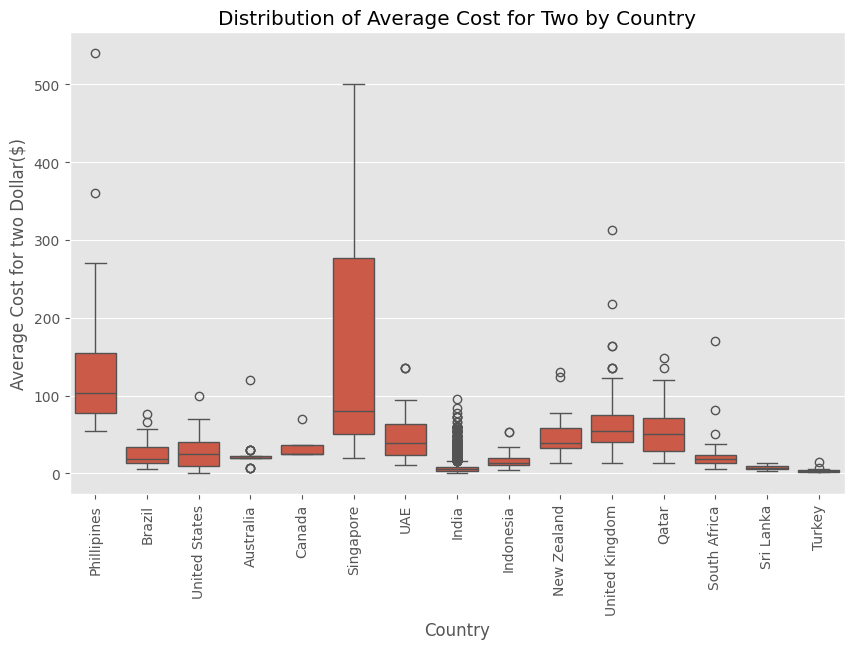

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Country', y='Average Cost for two Dollar($)', data=df)

plt.title('Distribution of Average Cost for Two by Country')

plt.xticks(rotation=90)

plt.show()

In [ ]:
united_State = df[df["Country"]=="United States"]

print(united_State["City"].unique())

print(" ")

print(united_State['Cuisines'].unique())

print(" ")

['Albany' 'Athens' 'Augusta' 'Boise' 'Cedar Rapids/Iowa City' 'Clatskanie'
 'Cochrane' 'Columbus' 'Dalton' 'Davenport' 'Des Moines' 'Dubuque'
 'Fernley' 'Gainesville' 'Lakeview' 'Lincoln' 'Macon' 'Mc Millan' 'Miller'
 'Monroe' 'Ojo Caliente' 'Orlando' 'Pensacola' 'Pocatello' 'Potrero'
 'Princeton' 'Rest of Hawaii' 'Savannah' 'Sioux City' 'Tampa Bay'
 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton' 'Winchester Bay']
 
['BBQ, Burger, Seafood' 'American, BBQ' 'Unknown' 'Mexican'
 'Coffee and Tea, Sandwich' 'Fast Food' 'Asian, Chinese, Vegetarian'
 'Pizza, Bar Food, Sandwich' 'Steak, Tapas, Bar Food'
 'Chinese, Seafood, Vegetarian' 'Chinese' 'American, Burger, Sandwich'
 'American, Steak' 'Japanese, Steak, Sushi' 'Seafood, Tapas, Bar Food'
 'Italian, Pizza' 'American, Breakfast, Diner'
 'American, Southern, Southwestern' 'Southern' 'Japanese, Korean'
 'Breakfast, Burger, Sandwich' 'Breakfast, Sandwich'
 'American, Italian, Pizza' 'American'
 'International, Southern, Vegetarian' 'Sandwich' 'Ita

In [ ]:
united_State_Rating = united_State.groupby(['City', 'Price range', 'Cuisines'])['Aggregate rating'].mean().reset_index()

pivot_data = united_State_Rating.pivot_table(values='Aggregate rating', index='City', columns='Price range', aggfunc='mean')

pivot_data

Price range,1,2,3,4
City,,,,
Albany,3.551852,3.520000,3.675000,3.500000
Athens,4.208333,4.150000,4.250000,NaN
Augusta,4.033333,4.033333,4.300000,NaN
Boise,4.316667,4.312500,4.133333,4.000000
Cedar Rapids/Iowa City,4.380000,4.156250,4.000000,NaN
Clatskanie,4.300000,NaN,NaN,NaN
Cochrane,NaN,3.100000,NaN,NaN
Columbus,3.800000,4.137500,3.985714,NaN
Dalton,4.181818,4.066667,3.800000,NaN


<Figure size 1000x600 with 0 Axes>

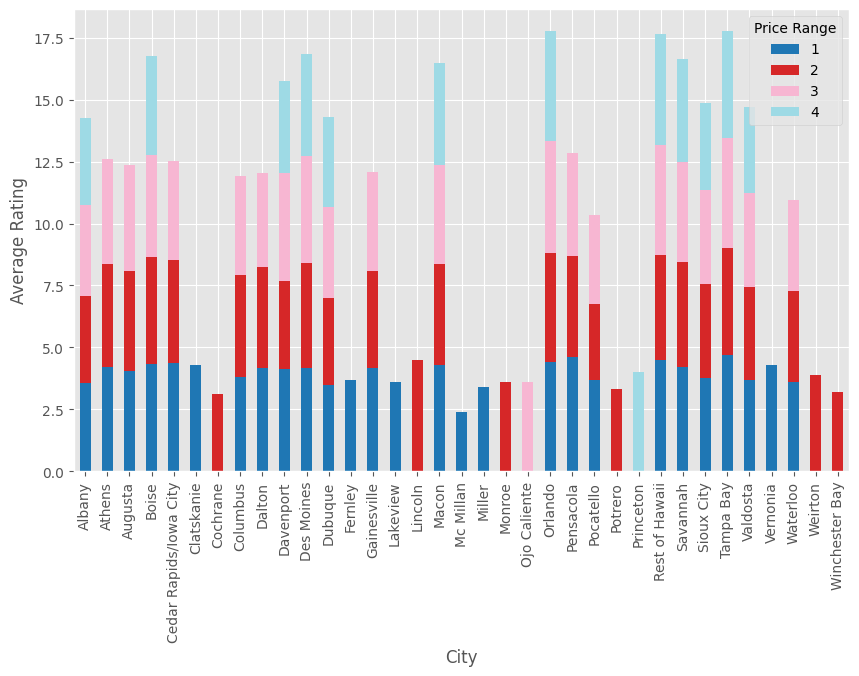

In [ ]:
plt.figure(figsize=(10, 6))

pivot_data.plot( kind='bar', stacked=True, figsize=(10, 6), cmap='tab20')

plt.xlabel('City')

plt.ylabel('Average Rating')

plt.xticks(rotation=90)

plt.legend(title='Price Range')

plt.show()

In [ ]:
df_cuisines = df.copy()

df_cuisines['Cuisines_split'] = df_cuisines['Cuisines'].str.split(', ')

df_cuisines = df_cuisines .explode('Cuisines_split')

In [ ]:
average_ratings_by_cuisine = df_cuisines.groupby('Cuisines_split')['Aggregate rating'].mean().reset_index()

average_ratings_by_cuisine = average_ratings_by_cuisine.sort_values(by='Aggregate rating', ascending=False)

average_ratings_by_cuisine = average_ratings_by_cuisine.head(10)

In [ ]:
average_ratings_by_cuisine

,Cuisines_split,Aggregate rating
130,Sunda,4.900000
26,Bí_rek,4.700000
132,Taiwanese,4.650000
112,Ramen,4.500000
43,Dim Sum,4.466667
61,Hawaiian,4.412500
47,Dí_ner,4.400000
23,Bubble Tea,4.400000
40,Curry,4.400000
75,Kebab,4.380000


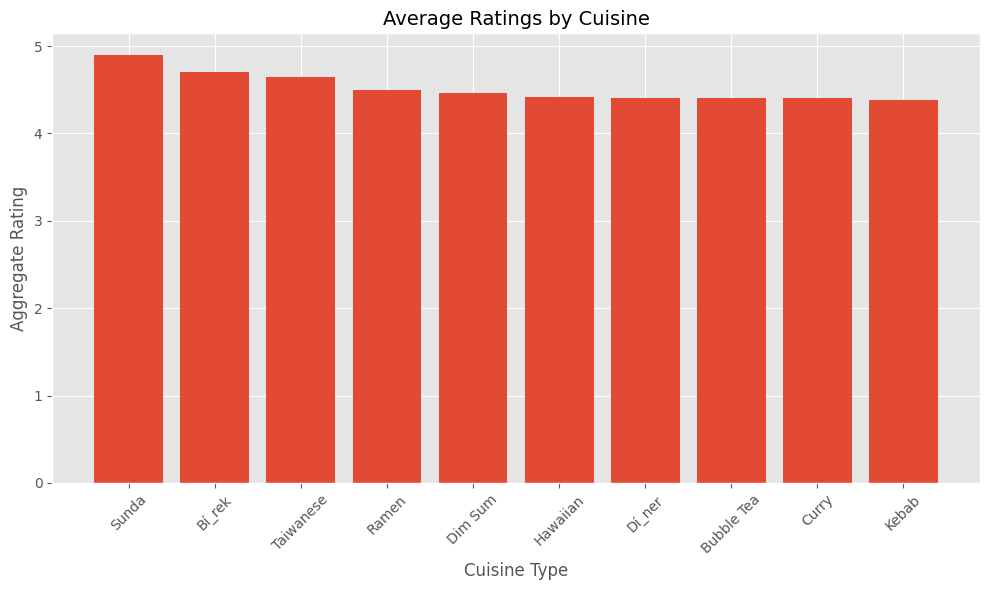

In [ ]:
plt.figure(figsize=(10, 6))

plt.style.use('ggplot')

plt.bar(average_ratings_by_cuisine["Cuisines_split"], average_ratings_by_cuisine["Aggregate rating"])



plt.xlabel('Cuisine Type', fontsize=12)

plt.ylabel('Aggregate Rating', fontsize=12)

plt.title('Average Ratings by Cuisine', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [ ]:
Online_delivery = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

Online_delivery = Online_delivery.value_counts()

Online_delivery

,count
Has Online delivery,
0,7100
1,2451


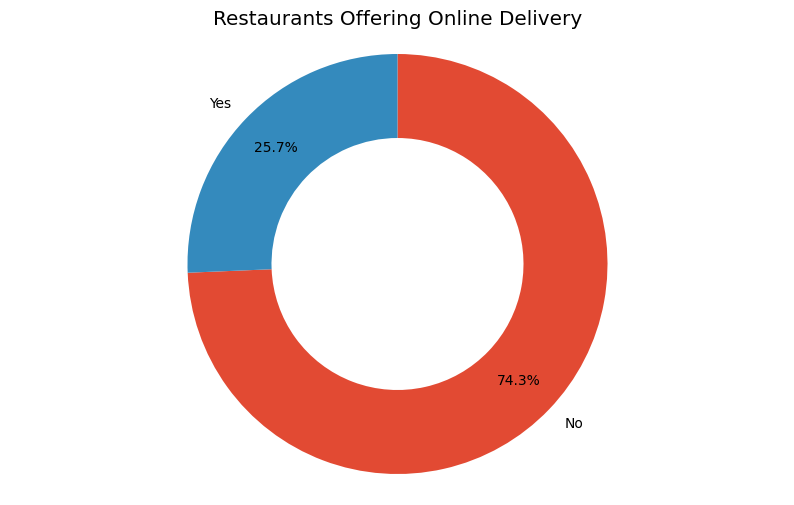

In [ ]:
plt.figure(figsize=(10, 6))

plt.style.use('ggplot')

plt.pie(Online_delivery, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, counterclock=False

        ,wedgeprops=dict(width=0.4),pctdistance=0.8)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')

plt.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Restaurants Offering Online Delivery')

plt.show()

In [ ]:
len(df["Country"].unique())

15

In [ ]:
(df["Country"].unique())

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [ ]:
online_delivery_by_country = df.groupby('Country')['Has Online delivery'].value_counts().unstack().fillna(0)


In [ ]:
online_delivery_by_country

Has Online delivery,No,Yes
Country,,
Australia,24.0,0.0
Brazil,60.0,0.0
Canada,4.0,0.0
India,6229.0,2423.0
Indonesia,21.0,0.0
New Zealand,40.0,0.0
Phillipines,22.0,0.0
Qatar,20.0,0.0
Singapore,20.0,0.0


In [ ]:
num_plots = len(df["Country"].unique())

num_plots

15

In [ ]:
online_delivery_by_country = df.groupby('Country')['Has Online delivery'].value_counts().unstack().fillna(0)

online_delivery_by_country = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

online_delivery_by_country

,Has Online delivery
0,0
1,0
2,0
3,0
4,0
...,...
9546,0
9547,0
9548,0
9549,0


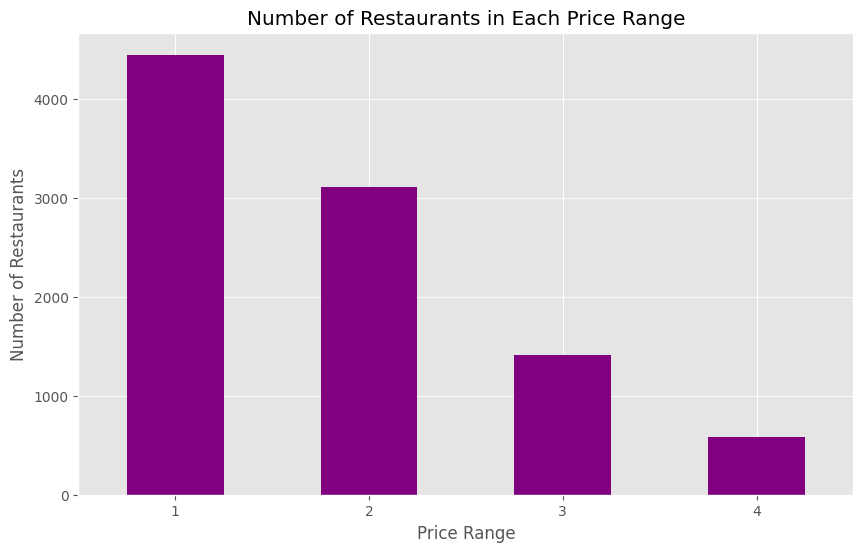

In [ ]:
price_counts = df['Price range'].value_counts()

plt.figure(figsize=(10, 6))

price_counts.plot(kind='bar', color='purple')

plt.title('Number of Restaurants in Each Price Range')

plt.xlabel('Price Range')

plt.ylabel('Number of Restaurants')

plt.xticks(rotation=0)

plt.grid(axis='y', alpha=0.75)

plt.show()

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Average Cost for two Dollar($)'],
      dtype='object')

In [ ]:
restaurant_counts = df['Country'].value_counts().reset_index()

restaurant_counts

,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,South Africa,60
5,UAE,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


In [ ]:
fig = px.treemap(restaurant_counts,

                 path=['Country'],

                 values='count',

                 title='Number of Restaurants for each Country')

fig.show()

In [ ]:
df_india = df[df["Country"]=="India"]
restaurant_counts = df_india['City'].value_counts().reset_index()
restaurant_counts

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Guwahati,21
6,Lucknow,21
7,Bhubaneshwar,21
8,Ahmedabad,21
9,Amritsar,21


In [ ]:
fig = px.treemap(restaurant_counts,

                 path=['City'],

                 values='count',

                 title='Number of Restaurants for each Country')

fig.show()

In [ ]:
df_us = df[df["Country"]=="United States"]

restaurant_counts = df_us['City'].value_counts().reset_index()

restaurant_counts

,City,count
0,Albany,20
1,Athens,20
2,Augusta,20
3,Boise,20
4,Cedar Rapids/Iowa City,20
5,Dalton,20
6,Columbus,20
7,Davenport,20
8,Des Moines,20
9,Gainesville,20


In [ ]:
fig = px.treemap(restaurant_counts,

                 path=['City'],

                 values='count',

                 title='Number of Restaurants for each Country')

fig.show()

In [ ]:
rating_distribution = df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()

rating_distribution


,Country,City,Aggregate rating
0,Australia,Armidale,3.500
1,Australia,Balingup,3.200
2,Australia,Beechworth,4.600
3,Australia,Dicky Beach,3.600
4,Australia,East Ballina,4.100
...,...,...,...
136,United States,Valdosta,3.715
137,United States,Vernonia,4.300
138,United States,Waterloo,3.650
139,United States,Weirton,3.900


In [ ]:
fig = px.sunburst(rating_distribution, path=['Country', 'City'],)
fig.show()

In [ ]:
rating_distribution = df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()
fig = px.scatter(rating_distribution,x='City',  y='Aggregate rating',
                 color='Country',
                 hover_name='City', title='Average rating by City and Country',labels={'Aggregate Rating', 'City'},size_max=60)
fig.show()

## 🏁 Conclusion:  
  This EDA of the Zomato dataset reveals clear trends in global restaurants, with Indian entries dominating and cuisines like North Indian, Chinese, and Italian being most common. Ratings are mostly average, and most restaurants fall in lower price ranges. While the analysis provides useful insights, it lacks deeper exploration of variable relationships, rigorous handling of missing values, and stronger visualization narratives. Overall, the notebook shows good technical EDA skills but would benefit from more critical analysis and clearer conclusions.  




  
